# Code for figures 3 and 4

This code was used for the analysis presented in  
"Do higher-order interactions promote synchronization?"  
by Yuanzhao Zhang, Maxime Lucas, and Federico Battiston

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_context("paper")
sb.set_theme(style="ticks")

## Fig. 3: Higher-order interactions increase degree heterogeneity in simplicial complexes.

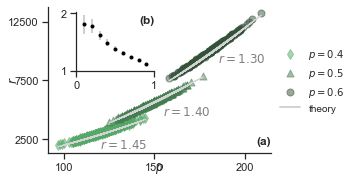

In [3]:
palette = sb.dark_palette("g", n_colors=4, reverse=True)
sb.set_palette(palette)

degrees = np.loadtxt('degrees_300.txt',delimiter=',')

fig, ax = plt.subplots(figsize=(4, 2.7))

ax.set_xlabel(r'$k^{(1)}$')
ax.set_ylabel(r'$k^{(2)}$')

ax.scatter(degrees[0,:], degrees[1,:], s=50, marker='d', alpha=.5, label=r'$p=0.4$')
ax.scatter(degrees[2,:], degrees[3,:], s=50, marker='^', alpha=.5, label=r'$p=0.5$')
ax.scatter(degrees[4,:], degrees[5,:], s=50, marker='o', alpha=.5, label=r'$p=0.6$')

ax.plot(degrees[0,:], degrees[0,:]*(degrees[0,:]-1)*.4/2, lw=1, c='lightgrey')#, label=r"$0.4 \binom{k^{(1)}}{2}$")
ax.plot(degrees[2,:], degrees[2,:]*(degrees[2,:]-1)*.5/2, lw=1, c='lightgrey')#, label=r"$0.5 \binom{k^{(1)}}{2}$")
ax.plot(degrees[4,:], degrees[4,:]*(degrees[4,:]-1)*.6/2, lw=1, c='lightgrey')#, label=r"$0.6 \binom{k^{(1)}}{2}$")

ax.text(120, 1700, r'$r = 1.45$', c='grey')
ax.text(155, 4500, r'$r = 1.40$', c='grey')
ax.text(185, 9000, r'$r = 1.30$', c='grey')

ax.set_yticks([2500, 7500, 12500])
ax.set_xticks([100, 150, 200])

# add inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(ax, width="100%", height="100%",
                    bbox_to_anchor=(.15, .6, .35, .4),
                    bbox_transform=ax.transAxes)

slope = np.loadtxt('slope.txt',delimiter=',')
link_density = np.arange(.1, 1, .1)
mean = np.zeros(9)
std = np.zeros(9)
for i in np.arange(9):
    mean[i] = np.mean(slope[i,:])
    std[i] = np.std(slope[i,:])

ax.set_xlabel(r'$p$', labelpad=-11)
ax.set_ylabel(r'$r$', labelpad=-11)
axins.errorbar(link_density, mean, yerr=std, fmt='o', color='black', ms=3,
             ecolor='silver')

axins.set_yticks([1, 2])
axins.set_xticks([0, 1])

# add'theory' to legend
handles, labels = ax.get_legend_handles_labels()
# manually define a new patch 
from matplotlib.lines import Line2D
line = Line2D([0], [0], color='lightgrey', lw=2, label="theory")
handles.append(line) 
ax.legend(handles=handles, loc='center left', frameon=False, ncol=1, fontsize="small",
          bbox_to_anchor=(1, 0.5))

ax.text(1, 0.05, "(a)", transform=ax.transAxes, va="bottom", ha="right", weight="bold")
axins.text(1, 0.95, "(b)", transform=axins.transAxes, va="top", ha="right", weight="bold")

sb.despine()

fig_name = f"figure_3"
# plt.savefig(f"{fig_name}.pdf", dpi=250, bbox_inches="tight")